<a href="https://colab.research.google.com/github/ingrego19980907/COMPUTER_MODELING_IN_THE_NATURAL_SCIENCES/blob/main/Neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras  import utils

#делим датасет на обучающую и тестовую выорки

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shatr/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', "Ankle boot"]

In [ ]:
# Предварительная обработка данных

In [ ]:
# Просмотр изображения

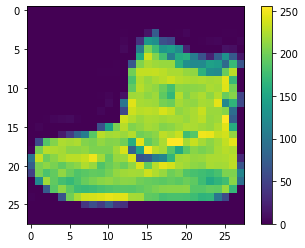

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)


In [ ]:
# Нормализация данных

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

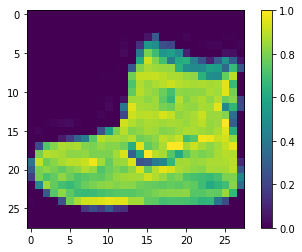

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

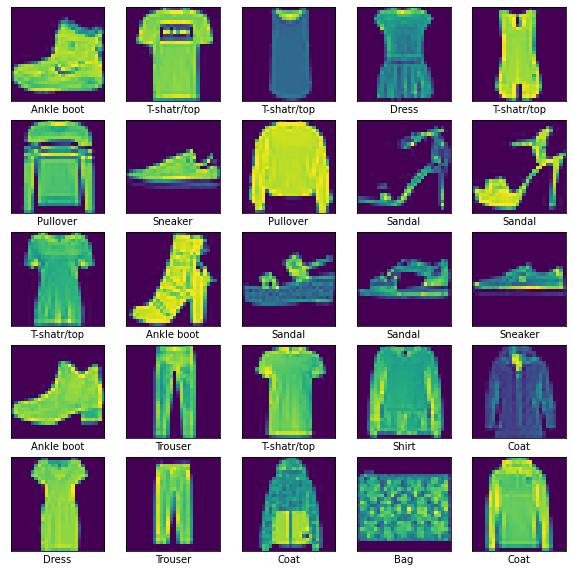

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

# Новый раздел

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation="relu"),
                          keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#  Обучение модели

In [ ]:
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2275 - accuracy: 0.9188
Epoch 2/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2261 - accuracy: 0.9192
Epoch 3/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2240 - accuracy: 0.9201
Epoch 4/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2222 - accuracy: 0.9205
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2206 - accuracy: 0.9226
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2194 - accuracy: 0.9219
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2178 - accuracy: 0.9224
Epoch 8/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2170 - accuracy: 0.9232
Epoch 9/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2153 - accuracy: 0.9236
Epoch 10/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.213

In [ ]:
# Проверка точности

In [ ]:
test_los, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3235 - accuracy: 0.8898
Test accuracy: 0.8898000121116638


In [ ]:
predictions = model.predict(x_train)
predictions[0]

array([2.3551579e-11, 3.7613388e-13, 2.6089089e-13, 4.5268929e-13,
       4.6228651e-13, 3.1942815e-05, 3.3728749e-11, 4.0830343e-04,
       1.2671497e-09, 9.9955970e-01], dtype=float32)

In [ ]:
np.argmax(predictions[10])


0

In [ ]:
y_train[10]

0

'Shirt'

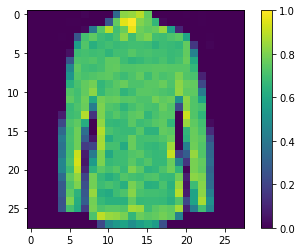

In [ ]:
i = 12000
plt.figure()
plt.imshow(x_train[i])
plt.colorbar()
plt.grid(False)
class_names[np.argmax(predictions[i])]